Demo notebook 
---------
In this notebook we're collecting tips'n tricks, useful and cool stuff.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')


In [2]:
def barplot_stack_dodge(df, index, dodge, stack, value):
    from matplotlib.pylab import rcParams

    rcParams['figure.figsize'] = 25, 18

    '''
    :param df: stacked dataframe (not pivoted)
    :param index: primary index
    :param dodge: column dimension to be dodged side by side, alphabetical order by default
    :param stack: dimension to be stacked on top of each other, alphabetical order by default
    :param value: value to be aggregated and summed up
    :param f: figure
    :param ax: figure
    :return: f, ax
    '''
    from cycler import cycler

    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                     (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                     (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                     (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                     (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    tableau20 = [(r / 255., g / 255., b / 255.) for (r, g, b) in tableau20]

    patterns = ('\\', '-','/', '+', 'x', '*', 'o', 'O', '.')
    df_plot = df.groupby([index, stack, dodge]).sum()[value].unstack().unstack()


    f, ax = plt.subplots(1,1)


    dodge_pos = []
    dodge_val = sorted(set([col[0] for col in df_plot.columns]))
    stack_val = sorted(set([col[1] for col in df_plot.columns]))
    print(stack_val)

    bar_width = 0.7/len(dodge_val)
    line_width = 1

    old_bar_positions = np.arange(len(df_plot.index))
    new_bar_positions = old_bar_positions + bar_width
    alpha = np.linspace(1, 0.5, len(stack_val), endpoint=True)


    for i in np.arange(len(dodge_val)):
        posi = old_bar_positions + bar_width*i
        dodge_pos.append(posi)




    dict_pos = dict(zip(dodge_val, dodge_pos))
    dict_alpha = dict(zip(stack_val, alpha))
    dict_hatch = dict(zip(stack_val, patterns[0:len(stack_val)]))
    dict_color = dict(zip(dodge_val,tableau20[0:len(dodge_val)]))


        # make bar plots
    for dodge_i in dodge_val:
        i = 0
        for stack_i in stack_val:
            bottom = 0
            if i >0:
                for jj in np.arange(0,i):
                    bottom = bottom + df_plot[(dodge_i, stack_val[jj])]

            _ = ax.bar(dict_pos[dodge_i], df_plot[(dodge_i, stack_i)],
                       bottom = bottom,
                        width = bar_width,
                       alpha = dict_alpha[stack_i],
                       hatch = dict_hatch[stack_i],
                       color = dict_color[dodge_i],
                            linewidth=line_width,
                            label=', '.join([dodge_i, stack_i]))
            i = i+1
    handles, labels = ax.get_legend_handles_labels()
    _ = plt.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1, 0.98), fontsize = 20)
    _ = plt.xticks(new_bar_positions, df_plot.index, rotation=45,fontsize = 20)
    _ = plt.yticks(fontsize = 20)
    _ = ax.tick_params(direction='out', length=10, width=1)
    return f, ax


,index_a,index_b,index_c,value
0,6,111,BB,29
1,5,222,AA,35
2,7,222,EE,186
3,1,111,CC,1
4,7,111,DD,164


['111', '222', '333']


(<Figure size 1800x1296 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x173d40ebac8>)

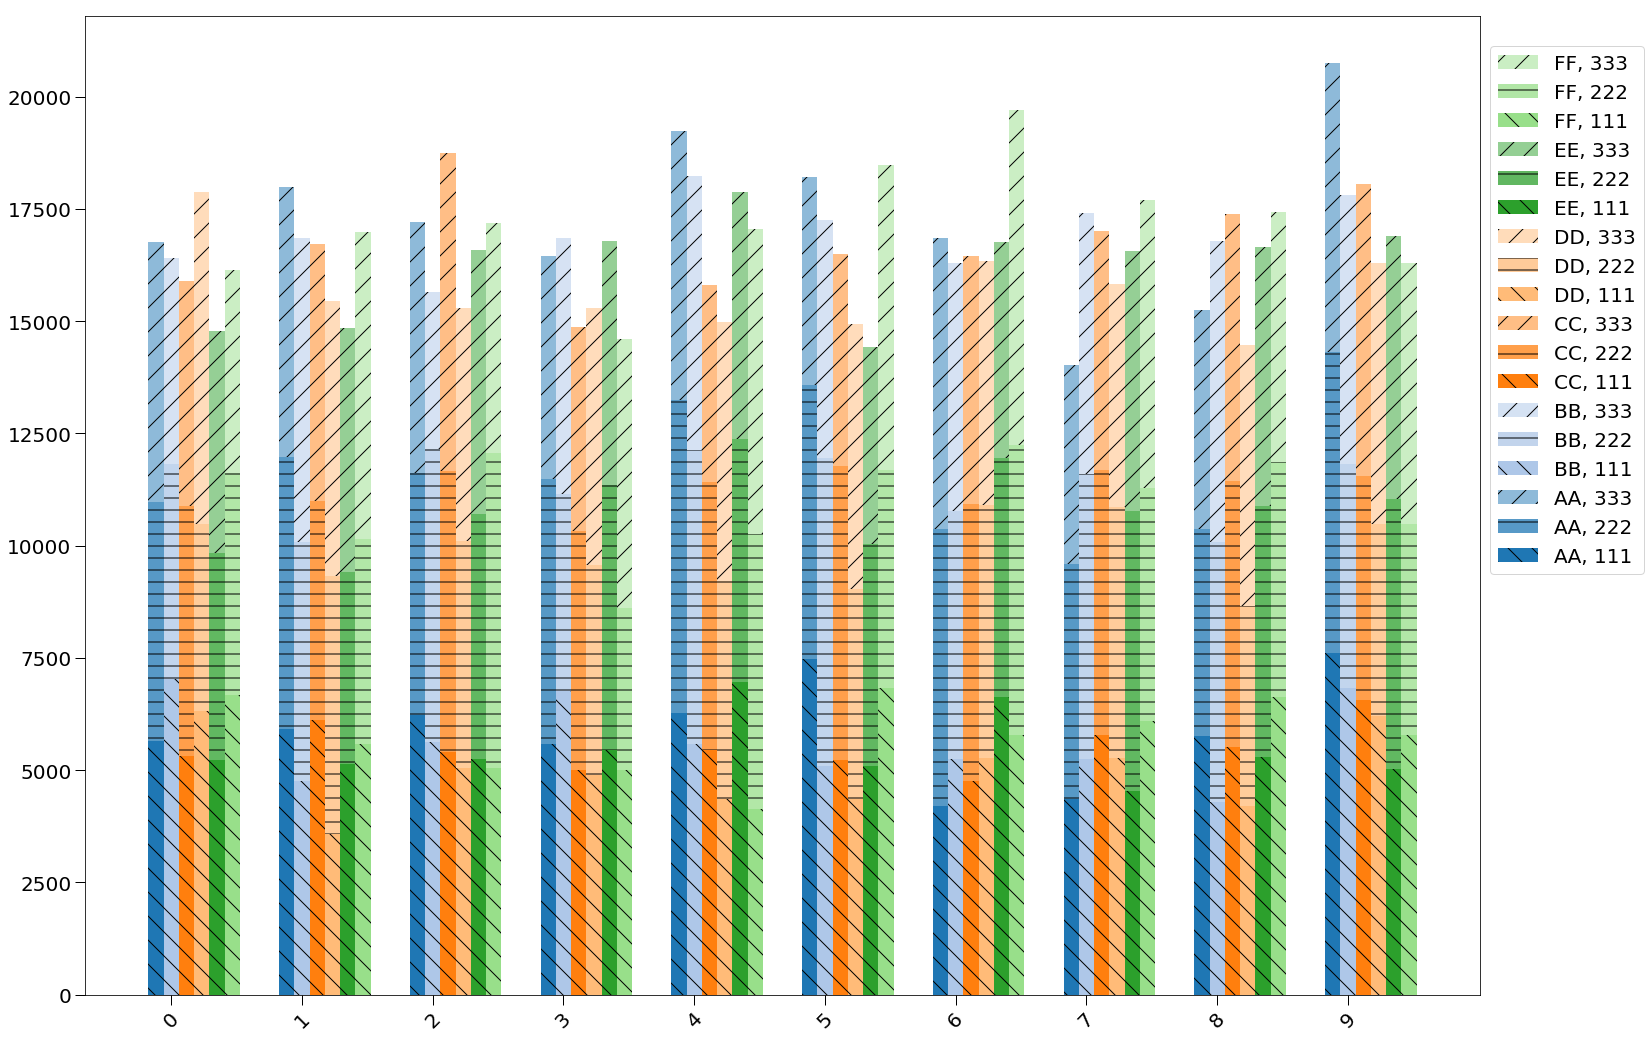

In [3]:
# ---
# fictitious dataframe
idx_all = [str(x) for x in np.arange(0,10)]
idx_2 = ['AA', 'BB', 'CC','DD','EE','FF']
idx_1 = ['111', '222', '333']
length = 10000
max_val = 200

df = pd.DataFrame({
         'index_a': np.random.choice(idx_all, length, replace = True), # main index
         'index_b': np.random.choice(idx_1, length, replace = True), # stack
         'index_c': np.random.choice(idx_2, length, replace = True), # dodge
         'value': np.random.choice(max_val, length)
     })
df.head()
    
barplot_stack_dodge(df = df,index = 'index_a', stack = 'index_b', dodge= 'index_c', value = 'value')